Unemployment Analysis in India - Task 2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Unemployment_in_India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.dropna(how='all', inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [11]:
df.dropna(subset=['Date'], inplace=True)

In [12]:
print("Cleaned Data Preview:")
print(df.head())

Cleaned Data Preview:
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [13]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None


In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [15]:
sns.set_style("whitegrid")


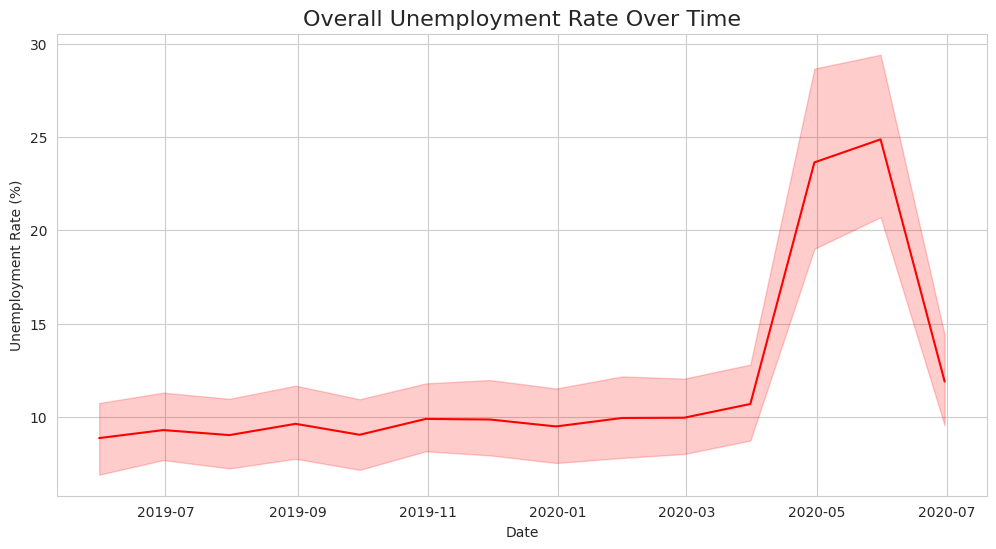

In [16]:
#Overall Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', color='red')
plt.title("Overall Unemployment Rate Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


/tmp/ipython-input-3096994619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg.values, palette="viridis")


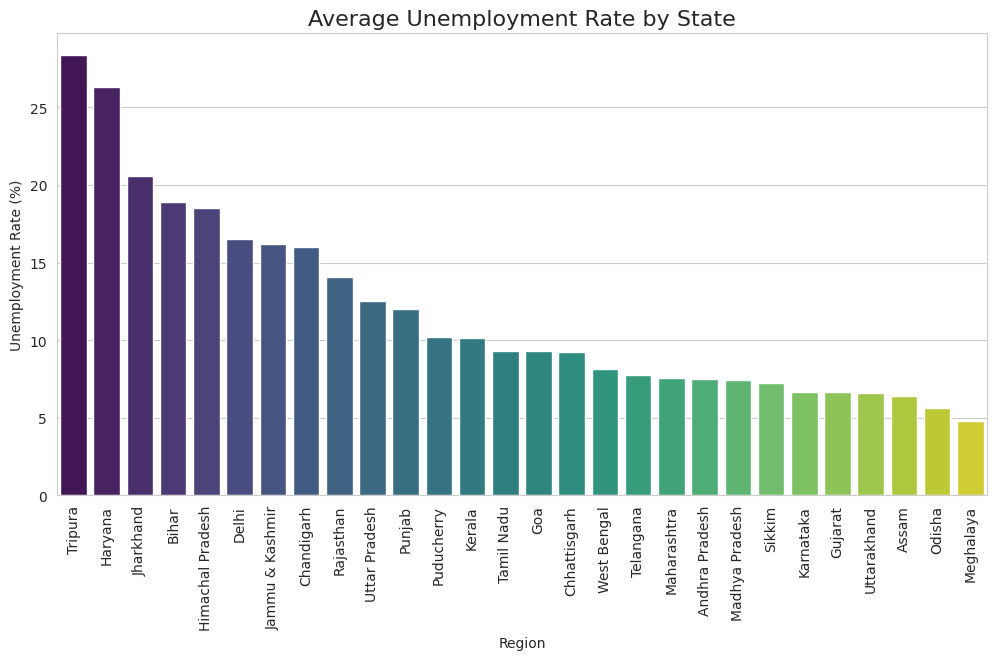

In [17]:
#State-wise Average Unemployment

state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.index, y=state_avg.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by State", fontsize=16)
plt.ylabel("Unemployment Rate (%)")
plt.show()


/tmp/ipython-input-1376262851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_avg, x='Area', y='Estimated Unemployment Rate (%)', palette="coolwarm")


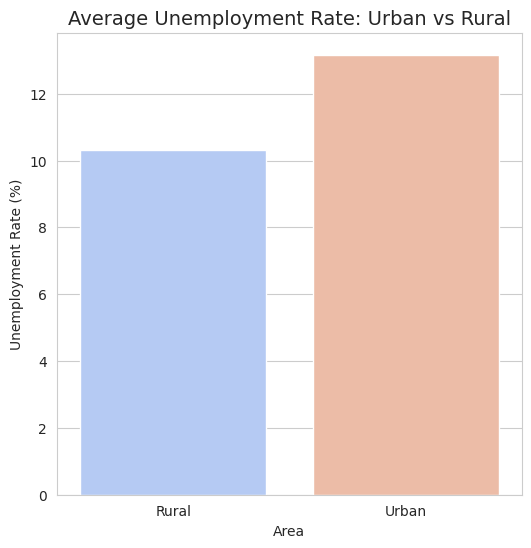

In [18]:
#Urban vs Rural Unemployment

area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=area_avg, x='Area', y='Estimated Unemployment Rate (%)', palette="coolwarm")
plt.title("Average Unemployment Rate: Urban vs Rural", fontsize=14)
plt.ylabel("Unemployment Rate (%)")
plt.show()

/tmp/ipython-input-2294588156.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Estimated Unemployment Rate (%)', palette="magma")


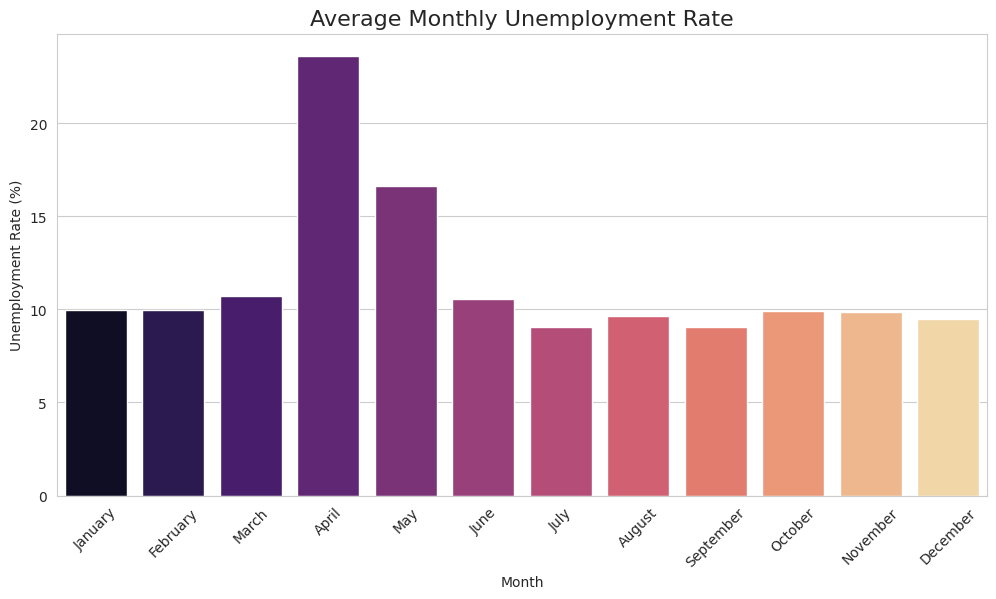

In [20]:
#Monthly Trends

df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg, x='Month', y='Estimated Unemployment Rate (%)', palette="magma")
plt.xticks(rotation=45)
plt.title("Average Monthly Unemployment Rate", fontsize=16)
plt.ylabel("Unemployment Rate (%)")
plt.show()

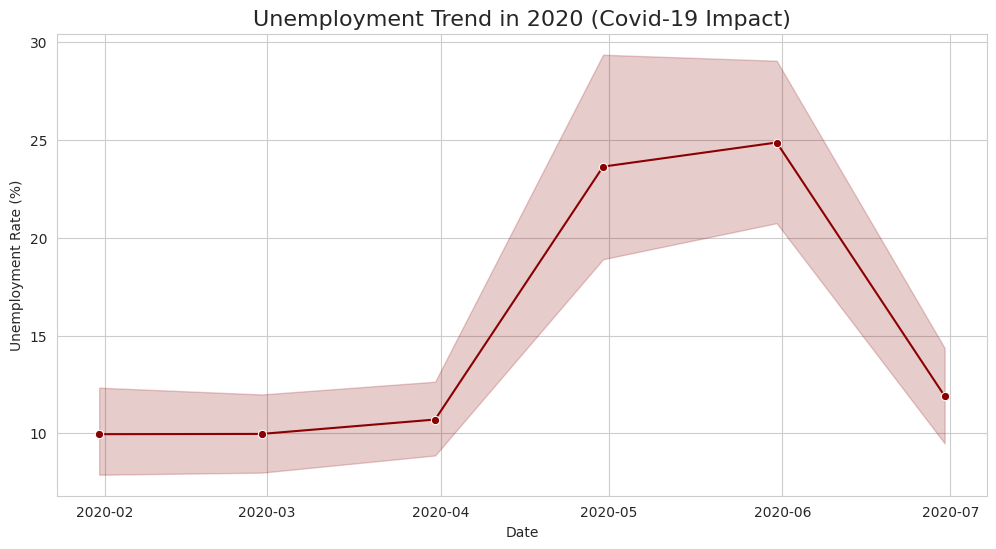

In [21]:
#Covid-19 Impact (2020)

covid_2020 = df[df['Date'].dt.year == 2020]

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_2020, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='darkred')
plt.title("Unemployment Trend in 2020 (Covid-19 Impact)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

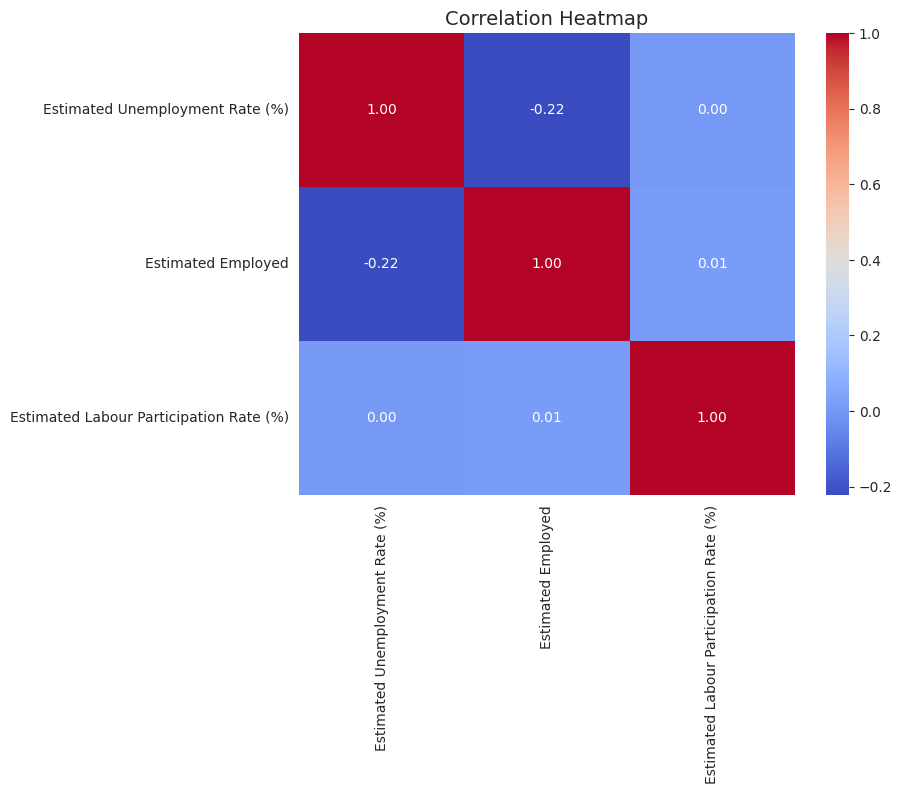

In [22]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [23]:
df.to_csv("unemployment_cleaned.csv", index=False)
print("\nCleaned data saved as 'unemployment_cleaned.csv'")


Cleaned data saved as 'unemployment_cleaned.csv'
